In [1]:
# %matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import json

# Load the .csv file
loadFile = "nueTopTens.csv"

# Create a dataframe and drop unused columns
songList = pd.read_csv(loadFile, encoding = "ISO-8859-1")


In [3]:
spotdata = songList.drop(["nrgy", "dB", "live", "val", "acous", "spch",
                          "title", "artist", "top genre", "bpm",
                          "dnce"], axis = 1)

# Convert columns to appropriate data types and print head to check work
spotdata.astype({"year" : int, "dur" : int})
spotdata.head(3)

,index,year,dur,pop,simplified genres
0,1,2010,217,83,folk
1,2,2010,263,82,hip hop
2,3,2010,200,80,pop


#### Duration Line Graph Helpers

In [4]:
def getDurAvgLine(lineColor):
    avgLine = spotdata.groupby(["year"]).mean()
    avgPlot = plt.plot(avgLine.index, avgLine["dur"], color = lineColor,
                       label = "Overall Average", marker = "o")
    plt.title(f"Average Duration in All Genres Over the Last Decade")
    plt.xlabel("Year Measured")
    plt.ylabel("Average Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# Plot the average Val of a specified genre over the decade in a line graph
def getDurGenreLine(genre, lineColor):
    nuList = spotdata.loc[spotdata["simplified genres"] == genre,:]
    valByYear = nuList.groupby(["year"]).mean()
    edmPlot = plt.plot(valByYear.index, valByYear["dur"], color = lineColor,
                       label = genre.capitalize(), marker = ".")
    plt.title(f"Valence in {genre.capitalize()} over the Last Decade")
    plt.xlabel("Year Measured")
    plt.ylabel("Average Valence Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# Create a multi-line graph comparing specified genres to the average of
    # all genres over the course of the decade
def getCompDur(genres, colors = ["green", "yellow", "purple",
                                 "brown", "red", "blue"]):
    x = 0
    genresTwo = genres
    for genre in genres:
        genresTwo[x] = getDurGenreLine(genre, colors[0])
        colors.remove(colors[0])
        x += 1
    getDurAvgLine("black")
    plt.title(f"Average Duration in Compared Genres Over the Last Decade")


#### Duration Scatter Plot Graph Helpers

In [5]:
# create a scatterplot of a data-point's popularity vs it's Val score
def getDurPopYear(year, pointColor):
    filterList = spotdata[shortList["year"] == year]
    popularity = filterList["pop"]
    duration = filterList["dur"]
    genrePlot = plt.scatter(popularity, duration, color = pointColor,
                            label = year, marker = ".")

def compDurPopYear(years, colors):
    # add a line to convert year to int
    x = 0
    yearsTwo = years
    for year in years:
        yearsTwo[x] = getDurPopYear(year, colors[0])
        colors.remove(colors[0])
        x += 1
    x = "Duration Relation to Popularity by"
    plt.title(f"{x} {years}")
    plt.xlabel("Pop Value")
    plt.ylabel("Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

def getDurPop(genre, pointColor):
    # add a line to convert year to int
    filterList = spotdata[spotdata["simplified genres"] == genre]
    popularity = filterList["pop"]
    duration = filterList["dur"]
    genrePlot = plt.scatter(popularity, duration, color = pointColor,
                            label = genre.capitalize(), marker = ".")
    handles = [popularity, duration]
    x = "Duration Relation to Popularity by"
    plt.title(f"{x} {genre.capitalize()}")
    plt.xlabel("Pop Value")
    plt.ylabel("Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)
              
# create a scatterplot of all data-points by Popularity vs Val score
def getTotDurPop():
    # add a line to convert year to int
    filterList = spotdata
    popularity = filterList["pop"]
    duration = filterList["dur"]
    genrePlot = plt.scatter(popularity, duration, color = "black",
                            label = "All Genres", marker = "o")
    handles = [popularity, duration]
    plt.title(f"Duration Relation to Popularity")
    plt.xlabel("Pop Value")
    plt.ylabel("Duration Value")
    plt.legend(loc = "best")
    fig = plt.gcf()
    fig.set_size_inches(9, 7)

# create a scatterplot of data-points in specified genres
    # by Popularity vs Val score 
def getCompDurPop(genres, Colors = ["green", "yellow", "purple",
                                          "brown", "red", "blue"]):
    getTotDurPop()
    x = 0
    genresTwo = genres
    for genre in genres:
        genresTwo[x] = getDurPop(genre, colors[0])
        colors.remove(colors[0])
        x += 1
    plt.title(f"Duration Relation to Popularity by Compared Genres")

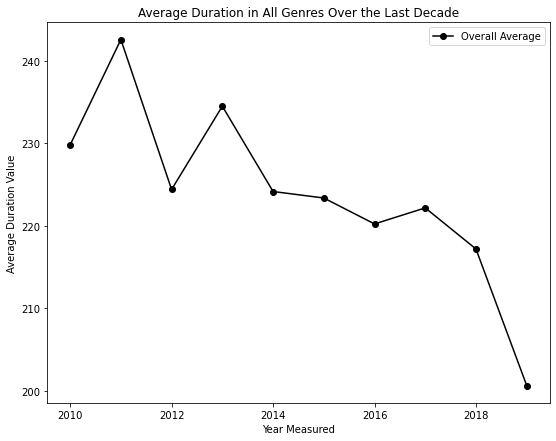

In [6]:
# Define the genres and the colors of the lines in the graph
genres = ["folk", "pop"]
colors = ["green", "blue"]

# Construct the graph
#getCompDur(genres, colors)

getDurAvgLine("black")

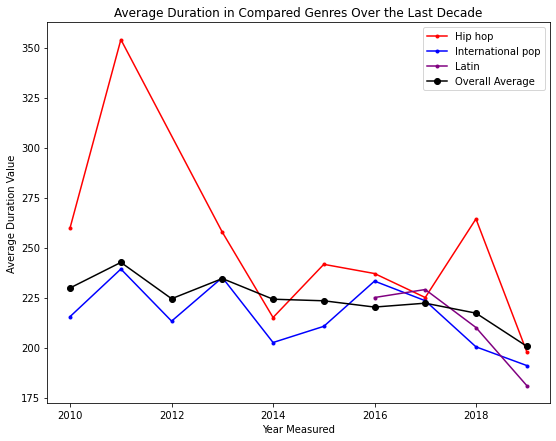

In [7]:
# Define the genres and the colors of the lines in the graph
genres = ["hip hop", "international pop", "latin"]
colors = ["red", "blue", 'purple']

# Construct the graph
getCompDur(genres, colors)

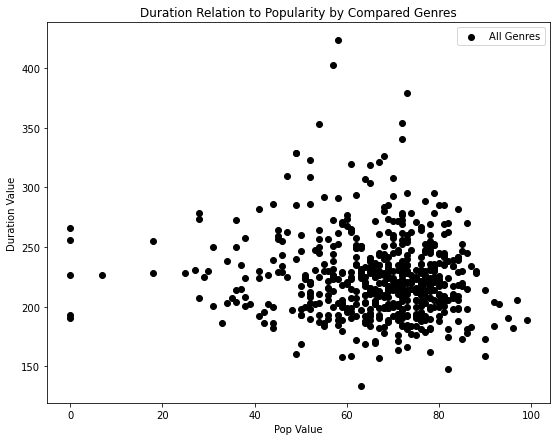

In [8]:
# Define the genres and the colors
genres = [""]
colors = ["red", "blue", "green"]

# Construct the scatter plot
getCompDurPop(genres, colors)
